In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [2]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [3]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [4]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
brst = pd.DataFrame(data.data)
brst.columns = data.feature_names
brst['Diagnosis'] = data.target
brst.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


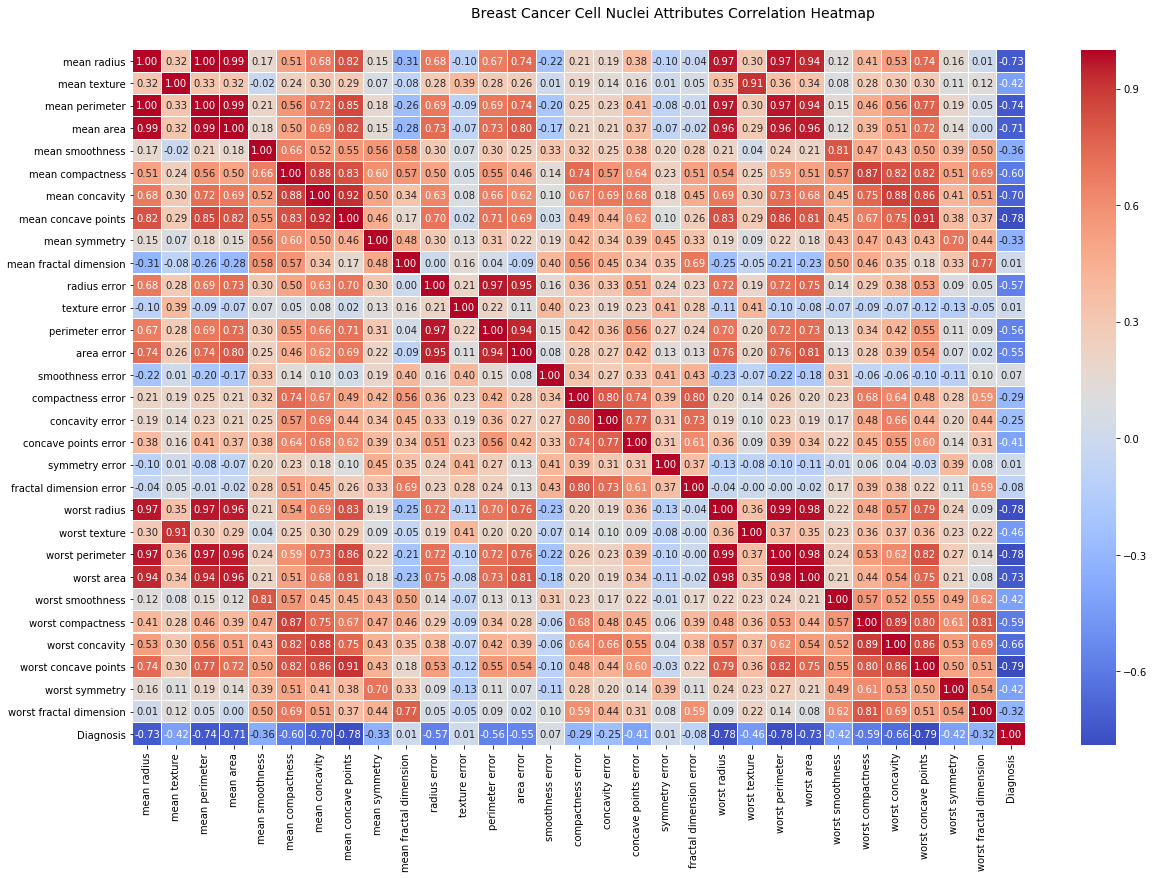

In [6]:
# how features correlate with each other and with a Diagnosis
f, ax = plt.subplots(figsize=(20, 12))
corr = brst.corr()
heatmap = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Breast Cancer Cell Nuclei Attributes Correlation Heatmap', fontsize=14)
heatmap

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X = brst[data.feature_names]
y = brst['Diagnosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
svm_classifier = svm.SVC(kernel='linear', C=10)
svm_classifier.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [10]:
# Number of Support Vectors for each class:

svm_classifier.n_support_

array([14, 14], dtype=int32)

In [11]:
# What are those Support Vectors:

svm_classifier.support_vectors_

array([[ 3.27802485e-01,  7.59894168e-01,  2.89792452e-01,
         1.56396038e-01, -3.57322049e-01,  5.23902828e-02,
        -4.29452842e-01, -3.99668716e-01, -2.73432630e-01,
         7.80208495e-02, -6.87323410e-01, -1.30972751e+00,
        -7.25491027e-01, -4.29504842e-01, -1.21208068e+00,
        -6.26557190e-01, -4.85139051e-01, -9.30206390e-01,
        -1.09674789e+00, -4.50300869e-01,  3.32525781e-01,
         4.19130090e-01,  2.09262713e-01,  1.76023445e-01,
        -4.75004343e-02,  5.50667480e-01,  4.79535400e-01,
         1.54568123e-01,  4.82941066e-01,  8.18554603e-01],
       [ 9.14107008e-01,  9.13711702e-01,  7.87405033e-01,
         7.81356447e-01, -6.40387888e-01, -7.70436794e-01,
        -7.45808127e-01, -5.12317846e-01, -8.81938974e-01,
        -1.32110601e+00, -4.93269982e-03,  2.01091411e-01,
        -1.36859893e-01,  8.91683086e-02, -4.23952324e-01,
        -7.85079483e-01, -6.61266804e-01, -6.65483676e-01,
        -7.97901321e-01, -8.22044052e-01,  7.61755879e-

In [12]:
weight=svm_classifier.coef_
intercept=svm_classifier.intercept_
print(weight)
print(intercept)

[[ 0.00668983 -0.04722042  0.64531792 -0.18983062  0.44221254  2.88620776
  -0.97521545 -3.63786463  0.09935969 -1.46319392 -2.20554773  0.67273706
   0.93629291 -0.8392097  -0.59242273 -0.40679728 -0.32821497 -1.07540905
   0.92090783  2.42301456 -1.84810114 -1.65304378  0.14403325 -1.83631349
  -0.02120151  0.38696543 -1.20495808  0.29183881 -1.47436212 -0.61554397]]
[-0.06041561]


In [13]:
y_pred = svm_classifier.predict(X_test)

In [14]:
print(y_test)

204    1
70     0
131    0
431    1
540    1
567    0
369    0
29     0
81     1
477    1
457    1
167    0
165    1
329    0
527    1
83     0
511    1
556    1
101    1
535    0
73     0
394    1
393    0
425    1
305    1
76     1
384    1
555    1
362    1
72     0
      ..
265    0
68     1
181    0
63     1
248    1
60     1
15     0
290    1
137    1
155    1
517    0
88     1
449    0
117    0
470    1
364    1
33     0
0      0
562    0
298    1
310    1
209    1
22     0
396    1
245    1
89     1
199    0
411    1
18     0
390    1
Name: Diagnosis, Length: 143, dtype: int64


In [16]:
sample = []
diff = []
for index, [predict, actual] in enumerate(zip(y_pred, y_test)):
    sample.append(index)
    diff.append(actual-predict)

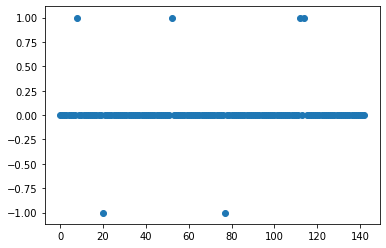

In [17]:
plt.scatter(sample, diff)

# dots at y = 1 are False Negatives
# dots at y = -1 are False Positives

In [18]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion

array([[52,  2],
       [ 4, 85]])

In [24]:
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

Accuracy = ((TP + TN) / float(TP + TN + FP + FN))

Precision = TP / float(TP + FP)

Recall = TP / float(FN + TP)

F1_score = 2*Precision*Recall/float(Precision+Recall)

print((Accuracy, Precision, Recall, F1_score))

(0.958041958041958, 0.9770114942528736, 0.9550561797752809, 0.9659090909090908)


In [25]:
## Grid Search for Parameter Selection

from sklearn import svm, model_selection

def svc_param_selection(X, y, nfolds=None):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = model_selection.GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

In [26]:
svc_param_selection(X_train, y_train, 5)

{'C': 10, 'gamma': 0.001}

In [28]:
svm_classifier.score(X_test, y_test) # it's just the accuracy again

0.958041958041958